In [133]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import copy

from scipy.stats import chisquare

# Load sklearn libraries for machine learning
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

In [134]:
t_train = pd.read_csv("Traveldata_train_(1)_(1).csv")
s_train = pd.read_csv("Surveydata_train_(1)_(1).csv")
t_test = pd.read_csv("Traveldata_test.csv")
s_test = pd.read_csv("Surveydata_test.csv")

In [135]:
t_train.head(10)

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0
5,98800006,Male,Loyal Customer,44.0,Business travel,Business,2810,0.0,0.0
6,98800007,Male,Loyal Customer,56.0,Personal Travel,Eco,2029,0.0,0.0
7,98800008,Male,Loyal Customer,65.0,Personal Travel,Business,853,0.0,3.0
8,98800009,Male,Loyal Customer,22.0,Personal Travel,Eco,1636,1.0,0.0
9,98800010,Male,Loyal Customer,57.0,Business travel,Business,306,0.0,0.0


In [136]:
s_train.head(10)

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good
5,98800006,1,need improvement,Ordinary,need improvement,acceptable,need improvement,good,excellent,good,acceptable,acceptable,good,acceptable,acceptable,acceptable,acceptable
6,98800007,0,good,Green Car,excellent,good,Inconvinient,good,good,good,good,good,excellent,need improvement,excellent,acceptable,good
7,98800008,0,acceptable,Green Car,NaN,acceptable,Inconvinient,excellent,excellent,good,good,good,acceptable,good,good,good,excellent
8,98800009,0,need improvement,Green Car,need improvement,need improvement,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,need improvement,acceptable,need improvement,acceptable
9,98800010,0,need improvement,Ordinary,good,good,Convinient,acceptable,good,good,need improvement,need improvement,need improvement,need improvement,acceptable,need improvement,acceptable


In [137]:
l=[t_train, s_train]

In [138]:
for i in l:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   CustomerType            85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   TypeTravel              85153 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94322 non-null  float64
 8   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94

In [139]:
for i in l:
    print(i.nunique())

ID                        94379
Gender                        2
CustomerType                  2
Age                          75
TypeTravel                    2
Travel_Class                  2
Travel_Distance            5210
DepartureDelay_in_Mins      437
ArrivalDelay_in_Mins        434
dtype: int64
ID                         94379
Overall_Experience             2
Seat_comfort                   6
Seat_Class                     2
Arrival_time_convenient        6
Catering                       6
Platform_location              6
Onboardwifi_service            6
Onboard_entertainment          6
Online_support                 6
Onlinebooking_Ease             6
Onboard_service                6
Leg_room                       6
Baggage_handling               5
Checkin_service                6
Cleanliness                    6
Online_boarding                6
dtype: int64


In [140]:
df_train = pd.merge(t_train, s_train, how = 'left', on ='ID')
df_train = df_train.set_index('ID')
df_train.shape

(94379, 24)

In [141]:
df_test = pd.merge(t_test,s_test, how = 'left', on ='ID')
df_test = df_test.set_index('ID')
df_test.shape


(35602, 23)

In [142]:
df_train.head(5)

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,need improvement,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,poor,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,need improvement,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,acceptable,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,acceptable,...,need improvement,good,excellent,good,good,good,good,good,good,good


In [143]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94379 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   CustomerType             85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   TypeTravel               85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   DepartureDelay_in_Mins   94322 non-null  float64
 7   ArrivalDelay_in_Mins     94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_time_convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_location        94349 non-null  object 
 14  Onboardwifi_servi

In [144]:
df_train.describe()

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience
count,94346.000000,94379.000000,94322.000000,94022.000000,94379.000000
mean,39.419647,1978.888185,14.647092,15.005222,0.546658
std,15.116632,1027.961019,38.138781,38.439409,0.497821
min,7.000000,50.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,0.000000,0.000000,0.000000
50%,40.000000,1923.000000,0.000000,0.000000,1.000000
75%,51.000000,2538.000000,12.000000,13.000000,1.000000
max,85.000000,6951.000000,1592.000000,1584.000000,1.000000


In [145]:
df_train.DepartureDelay_in_Mins.fillna(df_train.ArrivalDelay_in_Mins, inplace=True)
df_train.ArrivalDelay_in_Mins.fillna(df_train.DepartureDelay_in_Mins, inplace=True)

In [146]:
df_train = df_train.dropna( how='any', subset=['Gender', 'Age', 'DepartureDelay_in_Mins',
                                               'ArrivalDelay_in_Mins', 'Seat_comfort', 'Platform_location',
                                               'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
                                               'Onlinebooking_Ease', 'Leg_room', 'Baggage_handling',
                                               'Checkin_service', 'Cleanliness', 'Online_boarding'])

In [147]:
target = ['Overall_Experience']

In [148]:
num_col = ['Age', 'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins']

In [149]:
all_col = list(df_train.columns)
all_col

['Gender',
 'CustomerType',
 'Age',
 'TypeTravel',
 'Travel_Class',
 'Travel_Distance',
 'DepartureDelay_in_Mins',
 'ArrivalDelay_in_Mins',
 'Overall_Experience',
 'Seat_comfort',
 'Seat_Class',
 'Arrival_time_convenient',
 'Catering',
 'Platform_location',
 'Onboardwifi_service',
 'Onboard_entertainment',
 'Online_support',
 'Onlinebooking_Ease',
 'Onboard_service',
 'Leg_room',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

In [150]:
cat_col = [x for x in all_col if x not in num_col]
cat_col = [x for x in cat_col if x not in target]
cat_col

['Gender',
 'CustomerType',
 'TypeTravel',
 'Travel_Class',
 'Seat_comfort',
 'Seat_Class',
 'Arrival_time_convenient',
 'Catering',
 'Platform_location',
 'Onboardwifi_service',
 'Onboard_entertainment',
 'Online_support',
 'Onlinebooking_Ease',
 'Onboard_service',
 'Leg_room',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

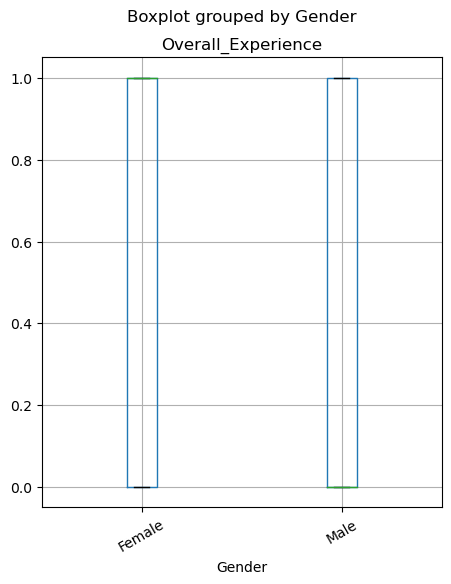

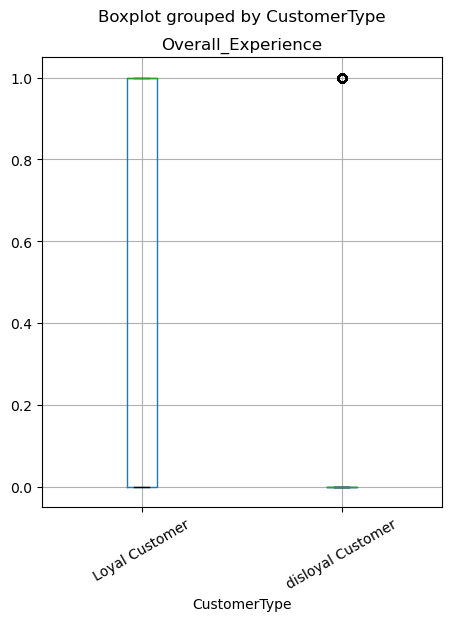

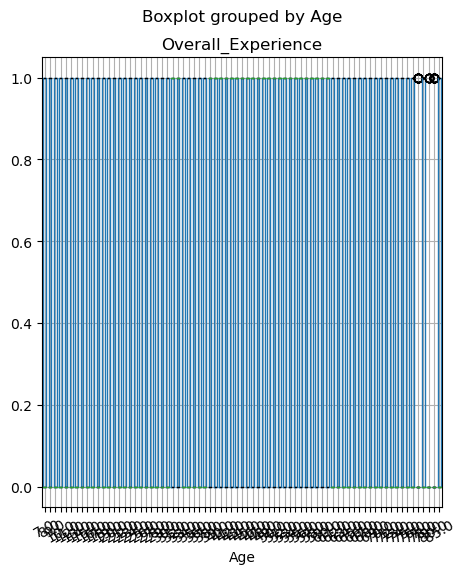

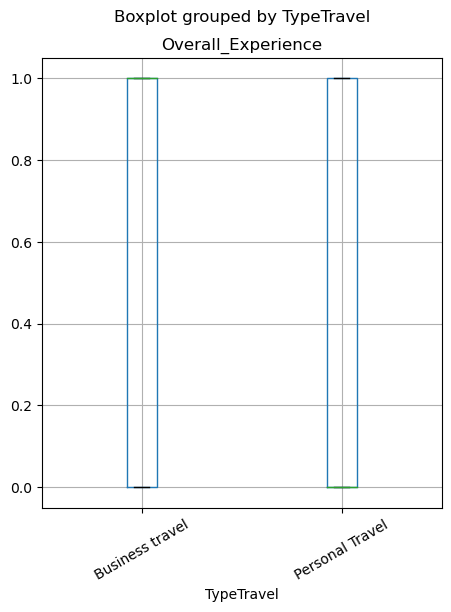

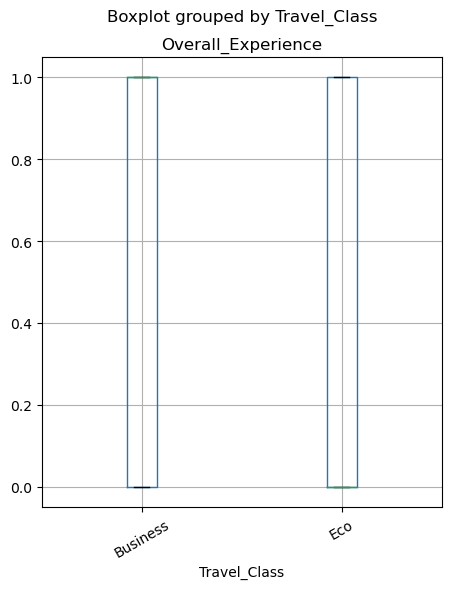

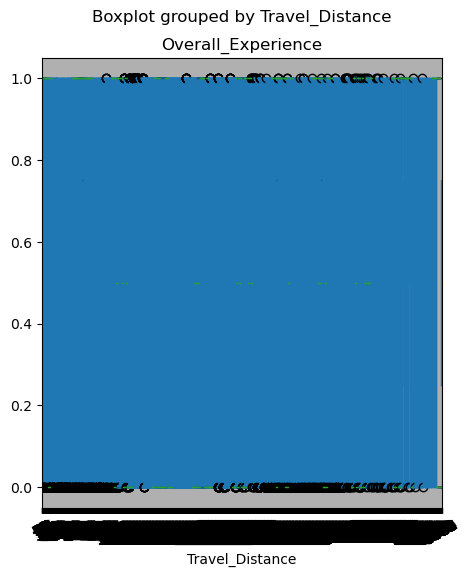

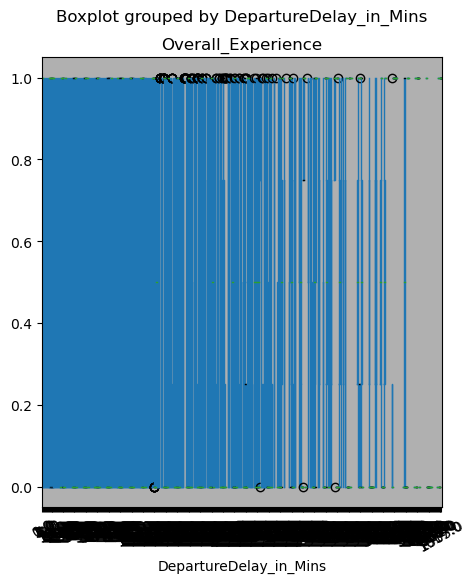

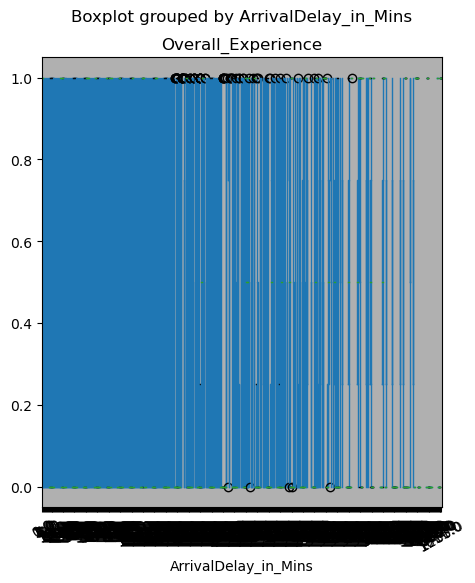

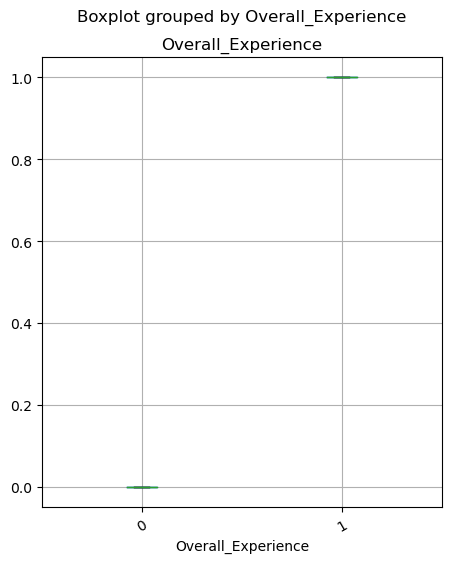

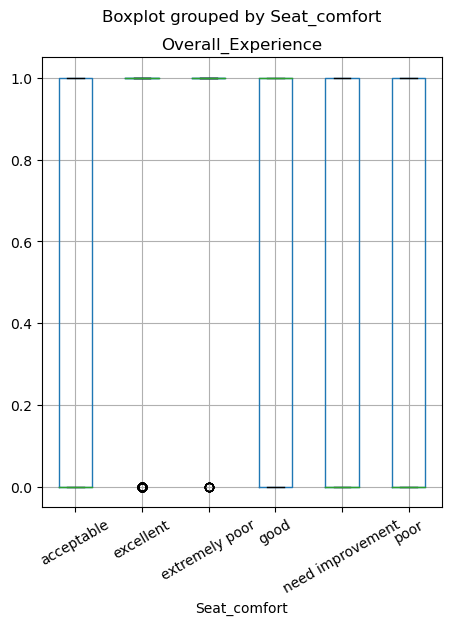

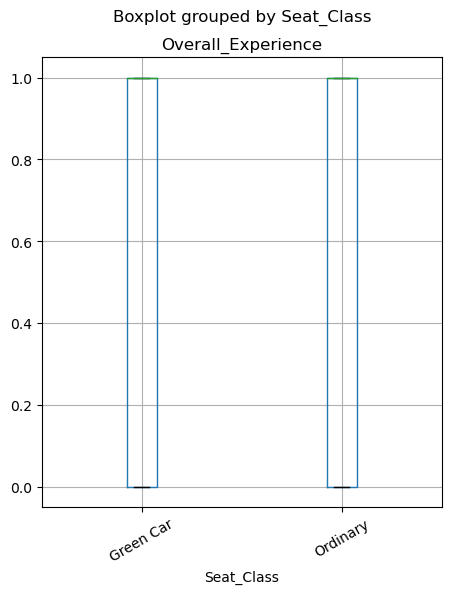

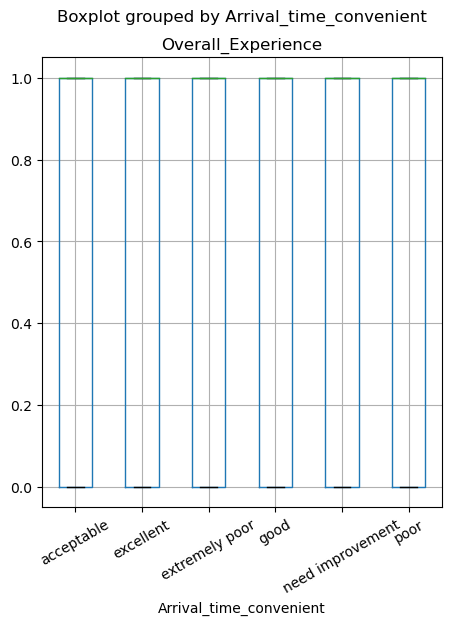

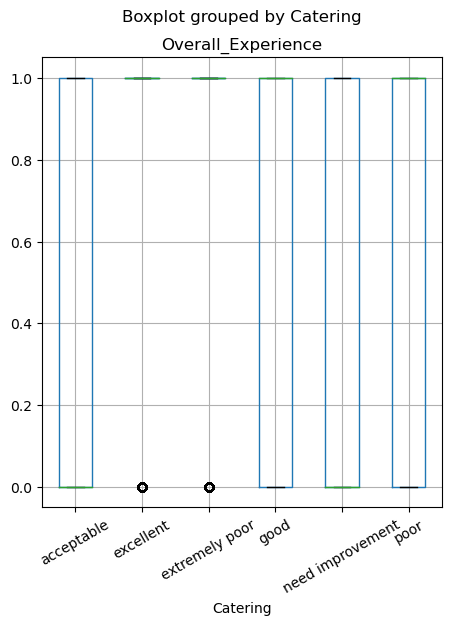

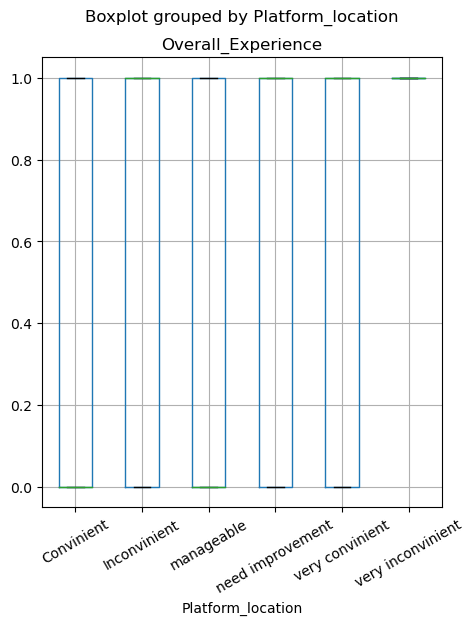

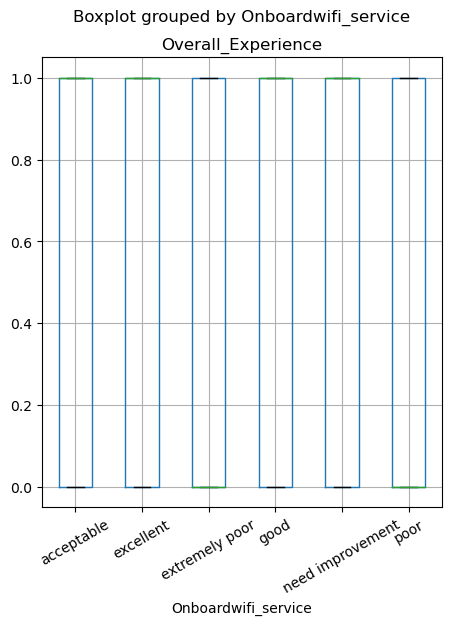

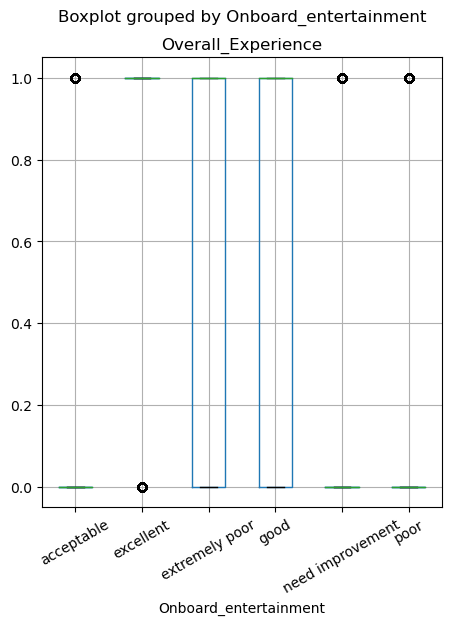

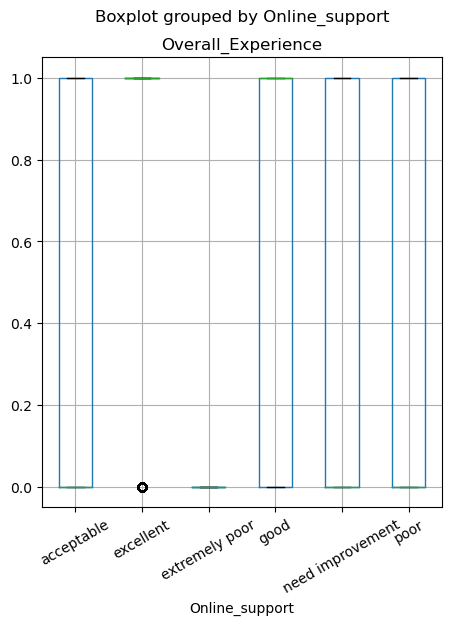

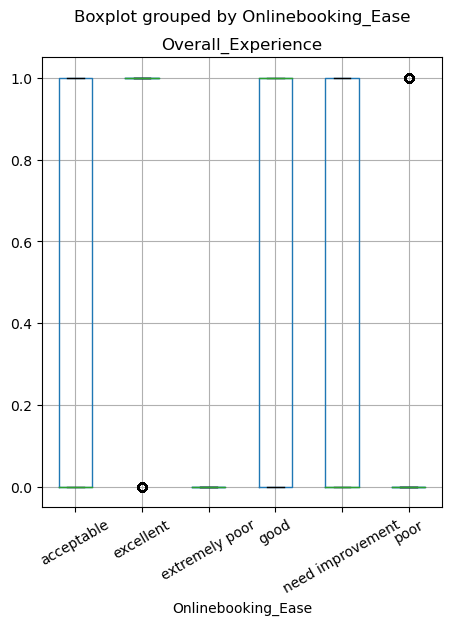

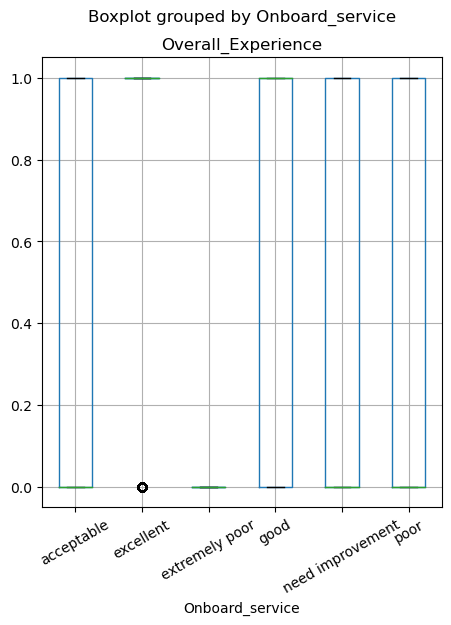

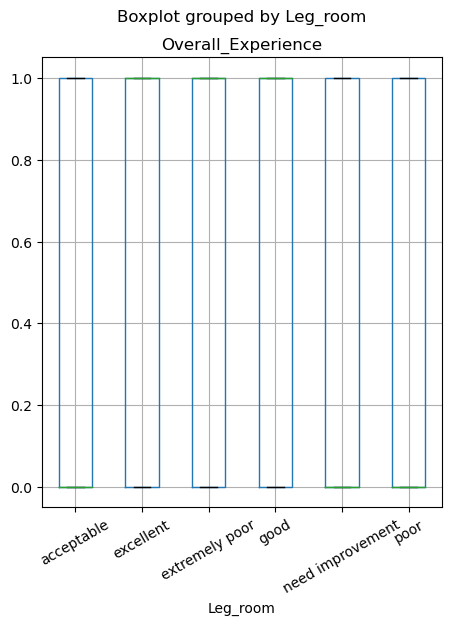

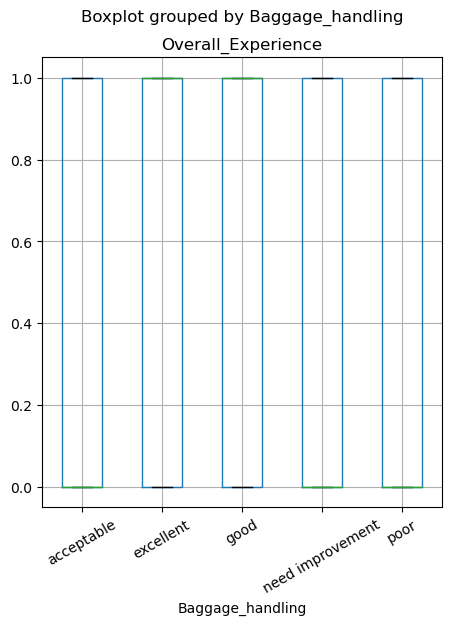

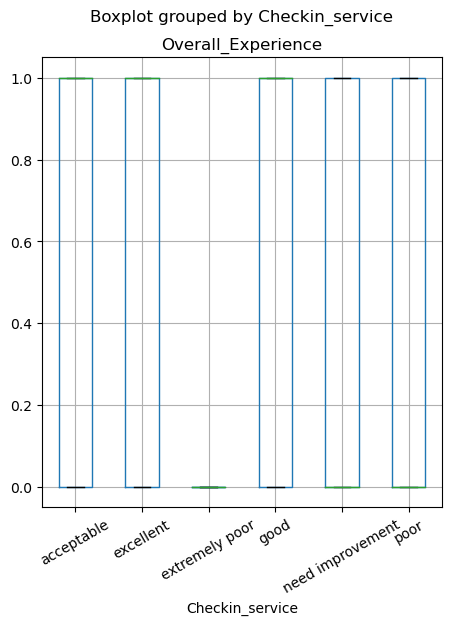

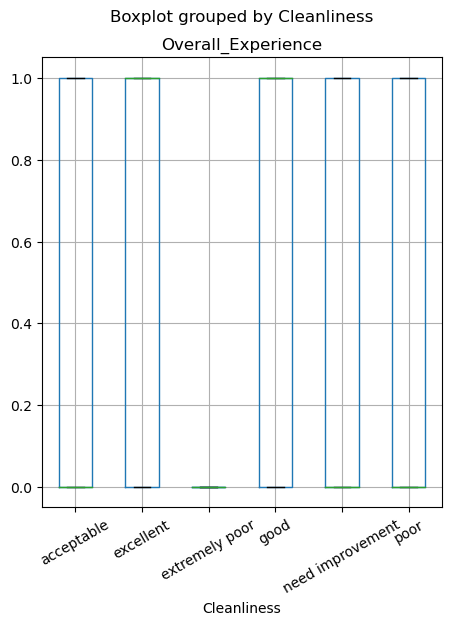

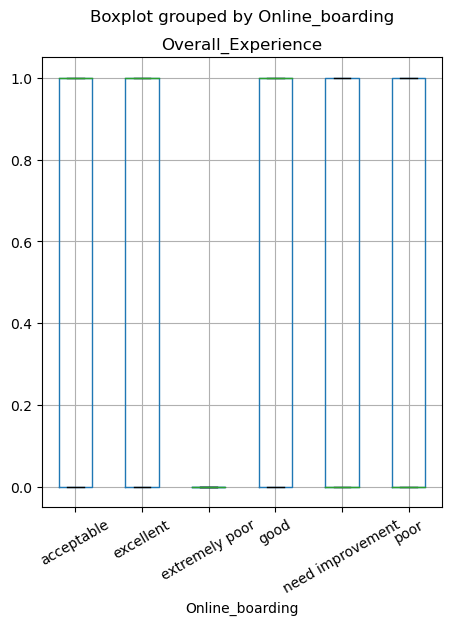

In [151]:
for i in all_col:
    df_train.boxplot('Overall_Experience', i ,rot = 30,figsize=(5,6))

Age
Skew : -0.0


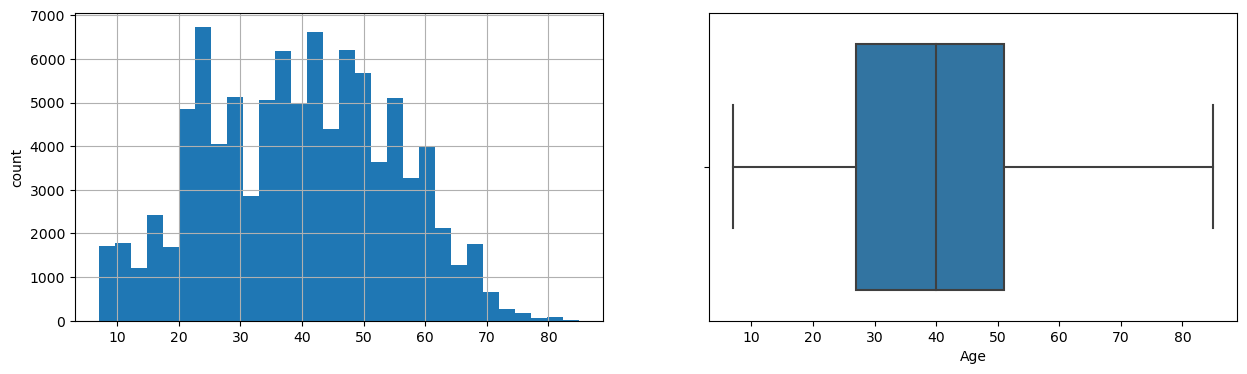

Travel_Distance
Skew : 0.47


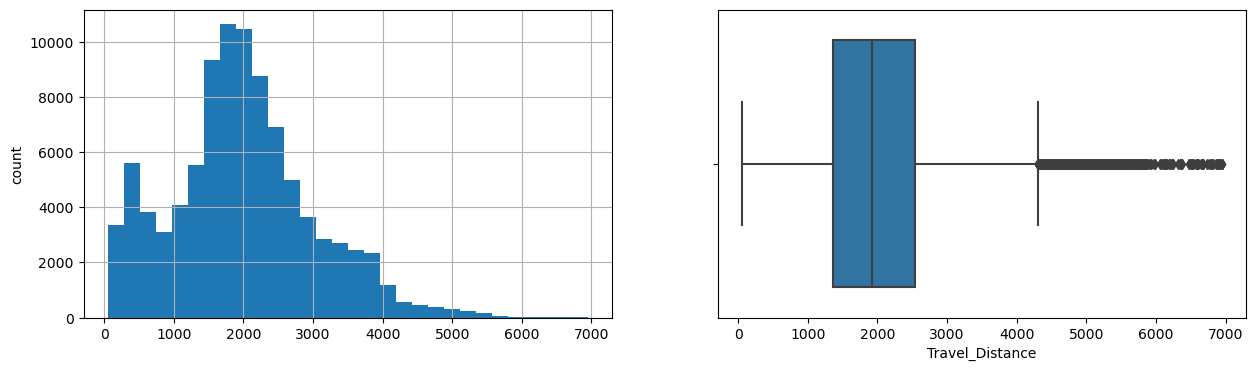

DepartureDelay_in_Mins
Skew : 6.41


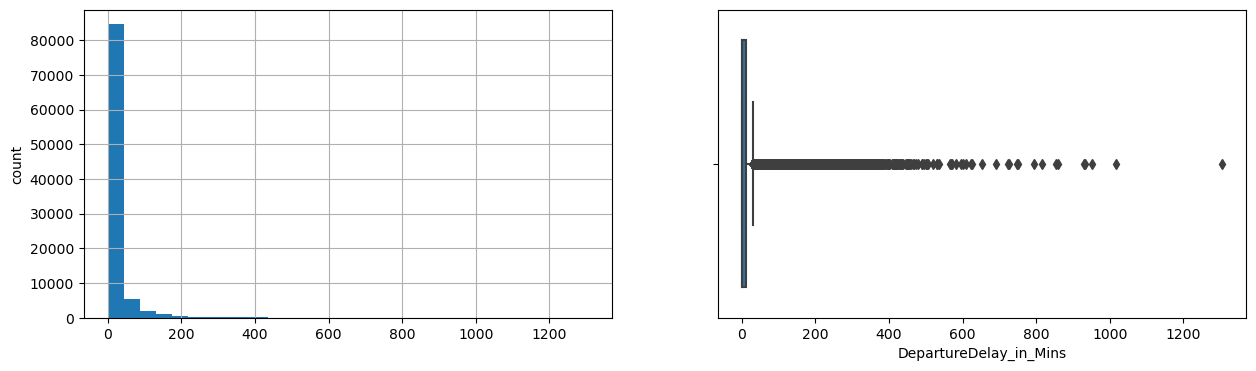

ArrivalDelay_in_Mins
Skew : 6.24


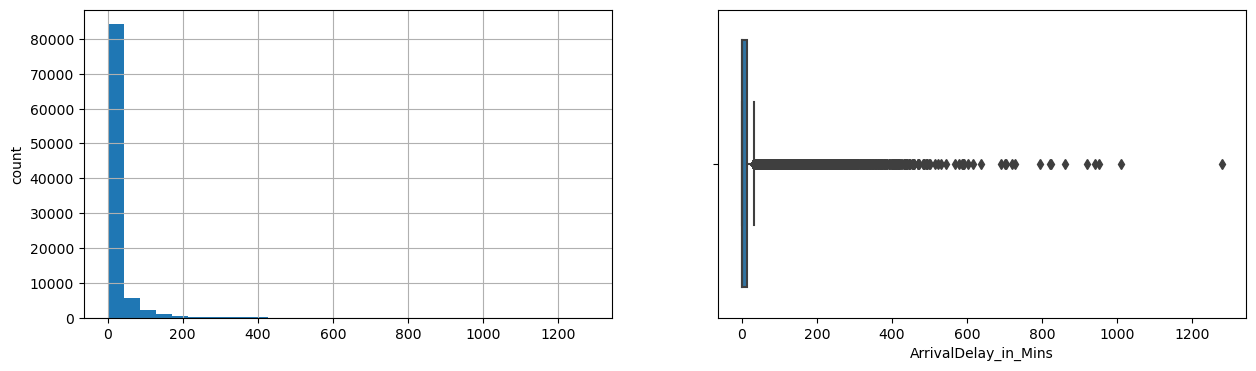

In [152]:
data = df_train

for col in num_col:  
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data = data)
    plt.show()

In [153]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93995 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   93995 non-null  object 
 1   CustomerType             85147 non-null  object 
 2   Age                      93995 non-null  float64
 3   TypeTravel               84836 non-null  object 
 4   Travel_Class             93995 non-null  object 
 5   Travel_Distance          93995 non-null  int64  
 6   DepartureDelay_in_Mins   93995 non-null  float64
 7   ArrivalDelay_in_Mins     93995 non-null  float64
 8   Overall_Experience       93995 non-null  int64  
 9   Seat_comfort             93995 non-null  object 
 10  Seat_Class               93995 non-null  object 
 11  Arrival_time_convenient  85175 non-null  object 
 12  Catering                 85300 non-null  object 
 13  Platform_location        93995 non-null  object 
 14  Onboardwifi_servi

In [154]:

#Remove Outliers
#Delete outliers by delay
print(df_train.shape)

from numpy import mean
from numpy import std

for i in num_col:
    print("i==",i)
    data = df_train[i]
    data_mean, data_std = mean(data), std(data)
    print("Mean, Std:",data_mean, data_std)
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print("Lower, Upper:", lower, upper)
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    df_train.drop(df_train[df_train[i] >= upper].index, inplace = True)
    #outliers_removed = [x for x in data if x >= lower and x <= upper]
    #print('Non-outlier observations: %d' % len(outliers_removed))



#df_train.drop(df_train[df_train['Departure_Delay_in_Mins'] >= 950].index, inplace = True)
#df_train.drop(df_train[df_train['Travel_Distance'] >= 6900].index, inplace = True)
#print(df_train[df_train['Departure_Delay_in_Mins'] >= 970].index)


print(df_train.shape)

(93995, 24)
i== Age
Mean, Std: 39.41930953774137 15.117624442600505
Lower, Upper: -5.933563790060148 84.77218286554289
Identified outliers: 18
i== Travel_Distance
Mean, Std: 1978.7277312533918 1027.9997131741425
Lower, Upper: -1105.2714082690356 5062.726870775819
Identified outliers: 618
i== DepartureDelay_in_Mins
Mean, Std: 14.370633789993466 36.877085616177375
Lower, Upper: -96.26062305853867 125.0018906385256
Identified outliers: 1942
i== ArrivalDelay_in_Mins
Mean, Std: 10.857291313431856 22.000458489232507
Lower, Upper: -55.14408415426567 76.85866678112939
Identified outliers: 2778
(88639, 24)


In [155]:
y = df_train[target]
df_train = df_train.drop(["Overall_Experience"], axis=1)

In [163]:
ind_train = df_train.index
ind_test = df_test.index

df = pd.concat([df_train,df_test], axis=0)
df.head(10)

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,need improvement,Green Car,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,poor,Ordinary,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,acceptable,Ordinary,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,acceptable,Ordinary,...,need improvement,good,excellent,good,good,good,good,good,good,good
98800006,Male,Loyal Customer,44.0,Business travel,Business,2810,0.0,0.0,need improvement,Ordinary,...,good,excellent,good,acceptable,acceptable,good,acceptable,acceptable,acceptable,acceptable
98800007,Male,Loyal Customer,56.0,Personal Travel,Eco,2029,0.0,0.0,good,Green Car,...,good,good,good,good,good,excellent,need improvement,excellent,acceptable,good
98800008,Male,Loyal Customer,65.0,Personal Travel,Business,853,0.0,3.0,acceptable,Green Car,...,excellent,excellent,good,good,good,acceptable,good,good,good,excellent
98800009,Male,Loyal Customer,22.0,Personal Travel,Eco,1636,1.0,0.0,need improvement,Green Car,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,need improvement,acceptable,need improvement,acceptable
98800010,Male,Loyal Customer,57.0,Business travel,Business,306,0.0,0.0,need improvement,Ordinary,...,acceptable,good,good,need improvement,need improvement,need improvement,need improvement,acceptable,need improvement,acceptable


In [164]:
df.tail(10)

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
99935593,Male,Loyal Customer,59.0,Business travel,Business,3118,4.0,13.0,need improvement,Ordinary,...,need improvement,excellent,good,good,NaN,good,good,excellent,good,acceptable
99935594,Female,Loyal Customer,59.0,Business travel,Eco,60,0.0,9.0,acceptable,Ordinary,...,need improvement,good,acceptable,need improvement,need improvement,acceptable,need improvement,poor,need improvement,poor
99935595,Male,Loyal Customer,24.0,Business travel,Business,2171,0.0,0.0,excellent,Ordinary,...,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent
99935596,Female,Loyal Customer,26.0,Personal Travel,Eco,1899,0.0,0.0,excellent,Ordinary,...,poor,excellent,poor,poor,acceptable,need improvement,excellent,good,excellent,poor
99935597,Male,disloyal Customer,32.0,Business travel,Eco,1667,0.0,0.0,acceptable,Ordinary,...,need improvement,need improvement,need improvement,need improvement,poor,good,acceptable,acceptable,acceptable,need improvement
99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,need improvement,Green Car,...,acceptable,need improvement,acceptable,acceptable,good,excellent,good,acceptable,good,acceptable
99935599,Female,Loyal Customer,53.0,Business travel,Business,1772,0.0,0.0,need improvement,Ordinary,...,acceptable,excellent,excellent,good,good,good,good,acceptable,good,good
99935600,Male,disloyal Customer,22.0,Business travel,Eco,1180,0.0,0.0,good,Green Car,...,need improvement,good,poor,need improvement,poor,acceptable,poor,poor,excellent,need improvement
99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,excellent,Ordinary,...,acceptable,excellent,good,excellent,excellent,excellent,excellent,acceptable,excellent,good


In [157]:
df.DepartureDelay_in_Mins.fillna(df.ArrivalDelay_in_Mins, inplace=True)
df.ArrivalDelay_in_Mins.fillna(df.DepartureDelay_in_Mins, inplace=True)

In [158]:
df['Gender'].value_counts()

Gender
Female    63041
Male      61170
Name: count, dtype: int64

In [159]:
df['CustomerType'].value_counts()

CustomerType
Loyal Customer       91952
disloyal Customer    20570
Name: count, dtype: int64

In [160]:
df['TypeTravel'].value_counts()

TypeTravel
Business travel    77197
Personal Travel    34913
Name: count, dtype: int64

In [161]:
df['Travel_Class'].value_counts()

Travel_Class
Eco         64917
Business    59324
Name: count, dtype: int64

In [162]:
df['Seat_Class'].value_counts()

Seat_Class
Green Car    62223
Ordinary     62018
Name: count, dtype: int64

In [165]:
df['Onlinebooking_Ease'].value_counts()

Onlinebooking_Ease
good                38307
excellent           32846
acceptable          21207
need improvement    19074
poor                12772
extremely poor         17
Name: count, dtype: int64

In [169]:
df['Platform_location'].value_counts()

Platform_location
manageable           32019
Convinient           28772
3                    23468
Inconvinient         21610
very convinient      18358
very inconvinient        2
Name: count, dtype: int64

In [195]:
df = df.replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], 
           [6, 5, 4, 3, 2, 1])
df = df.replace(['Male', 'Female'], [1,0])
df = df.replace(['Loyal Customer', 'disloyal Customer'], [1,0])
df = df.replace(['Business travel', 'Personal Travel'], [1,0])
df = df.replace(['Business', 'Eco'], [1,0])
df = df.replace(['Green Car', 'Ordinary'], [1,0])
df = df.replace(['very convinient', 'Convinient', 'manageable', 'Needs Improvement', 'Inconvinient', 'very inconvinient'], 
           [6, 5, 4, 3, 2, 1])

In [196]:
df.head().T

ID,98800001,98800002,98800004,98800005,98800006
Gender,0.0,1.0,0.0,0.0,1.0
CustomerType,1.0,1.0,1.0,1.0,1.0
Age,52.0,48.0,44.0,50.0,44.0
TypeTravel,NaN,0.0,1.0,1.0,1.0
Travel_Class,1.0,0.0,1.0,1.0,1.0
Travel_Distance,272.0,2200.0,780.0,1981.0,2810.0
DepartureDelay_in_Mins,0.0,9.0,13.0,0.0,0.0
ArrivalDelay_in_Mins,5.0,0.0,18.0,0.0,0.0
Seat_comfort,3.0,2.0,4.0,4.0,3.0
Seat_Class,1.0,0.0,0.0,0.0,0.0


In [197]:
df.tail()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
99935598,1.0,1.0,8.0,0.0,0,1334,0.0,0.0,3.0,1,...,4.0,3.0,4.0,4.0,5.0,6.0,5.0,4.0,5.0,4.0
99935599,0.0,1.0,53.0,1.0,1,1772,0.0,0.0,3.0,0,...,4.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
99935600,1.0,0.0,22.0,1.0,0,1180,0.0,0.0,5.0,1,...,3.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,3.0
99935601,0.0,1.0,67.0,0.0,0,420,23.0,16.0,6.0,0,...,4.0,6.0,5.0,6.0,6.0,6.0,6.0,4.0,6.0,5.0
99935602,1.0,NaN,20.0,0.0,0,1680,0.0,0.0,5.0,0,...,2.0,5.0,2.0,2.0,4.0,5.0,5.0,3.0,5.0,2.0


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124241 entries, 98800001 to 99935602
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   124211 non-null  float64
 1   CustomerType             112522 non-null  float64
 2   Age                      124230 non-null  float64
 3   TypeTravel               112110 non-null  float64
 4   Travel_Class             124241 non-null  int64  
 5   Travel_Distance          124241 non-null  int64  
 6   DepartureDelay_in_Mins   124212 non-null  float64
 7   ArrivalDelay_in_Mins     124118 non-null  float64
 8   Seat_comfort             124219 non-null  float64
 9   Seat_Class               124241 non-null  int64  
 10  Arrival_time_convenient  112603 non-null  float64
 11  Catering                 112660 non-null  float64
 12  Platform_location        124229 non-null  float64
 13  Onboardwifi_service      124229 non-null  float64
 14  

In [199]:
df19 = df
missing_columns = [col for col in df19.columns if df19[col].isnull().any()]
missig_values_count = df19.isna().sum()
missing_Values_df = pd.DataFrame(missig_values_count.rename("Null Values Count").loc[missig_values_count.ne(0)])
missing_Values_df['Share of Missing Values'] = missing_Values_df["Null Values Count"]/len(df19)
missing_Values_df.style.background_gradient(cmap='Pastel1')

,Null Values Count,Share of Missing Values
Gender,30,0.000241
CustomerType,11719,0.094325
Age,11,0.000089
TypeTravel,12131,0.097641
DepartureDelay_in_Mins,29,0.000233
ArrivalDelay_in_Mins,123,0.000990
Seat_comfort,22,0.000177
Arrival_time_convenient,11638,0.093673
Catering,11581,0.093214
Platform_location,12,0.000097


In [200]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))  #The parameter normalize=True gives the percentage of each category
    print('*'*40) 

Gender
0.0    0.507532
1.0    0.492468
Name: proportion, dtype: float64
****************************************
CustomerType
1.0    0.817191
0.0    0.182809
Name: proportion, dtype: float64
****************************************
Age
39.0    0.028520
25.0    0.026805
40.0    0.024833
41.0    0.023915
44.0    0.023907
          ...   
76.0    0.000475
74.0    0.000443
79.0    0.000394
78.0    0.000338
85.0    0.000056
Name: proportion, Length: 75, dtype: float64
****************************************
TypeTravel
1.0    0.688583
0.0    0.311417
Name: proportion, dtype: float64
****************************************
Travel_Class
0    0.522509
1    0.477491
Name: proportion, dtype: float64
****************************************
Travel_Distance
1963    0.000708
1812    0.000700
1789    0.000668
1639    0.000660
1748    0.000660
          ...   
5034    0.000008
5468    0.000008
4903    0.000008
5356    0.000008
5090    0.000008
Name: proportion, Length: 5057, dtype: float64
*********

In [202]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df)
arr = imputer.transform(df)

In [203]:
df = pd.DataFrame(arr, columns = df.columns, index = df.index)

In [204]:
df

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0.0,1.000000,52.0,0.333333,1.0,272.0,0.0,5.0,3.0,1.0,...,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0
98800002,1.0,1.000000,48.0,0.000000,0.0,2200.0,9.0,0.0,2.0,0.0,...,5.0,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0
98800004,0.0,1.000000,44.0,1.000000,1.0,780.0,13.0,18.0,4.0,0.0,...,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
98800005,0.0,1.000000,50.0,1.000000,1.0,1981.0,0.0,0.0,4.0,0.0,...,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
98800006,1.0,1.000000,44.0,1.000000,1.0,2810.0,0.0,0.0,3.0,0.0,...,5.0,6.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935598,1.0,1.000000,8.0,0.000000,0.0,1334.0,0.0,0.0,3.0,1.0,...,4.0,3.0,4.0,4.0,5.0,6.0,5.0,4.0,5.0,4.0
99935599,0.0,1.000000,53.0,1.000000,1.0,1772.0,0.0,0.0,3.0,0.0,...,4.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
99935600,1.0,0.000000,22.0,1.000000,0.0,1180.0,0.0,0.0,5.0,1.0,...,3.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,3.0


In [205]:

df19 = df
missing_columns = [col for col in df19.columns if df19[col].isnull().any()]
missig_values_count = df19.isna().sum()
missing_Values_df = pd.DataFrame(missig_values_count.rename("Null Values Count").loc[missig_values_count.ne(0)])
missing_Values_df['Share of Missing Values'] = missing_Values_df["Null Values Count"]/len(df19)
missing_Values_df.style.background_gradient(cmap='Pastel1')

,Null Values Count,Share of Missing Values


In [206]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))  
    print('*'*40) 

Gender
0.000000    0.507441
1.000000    0.492382
0.333333    0.000105
0.666667    0.000072
Name: proportion, dtype: float64
****************************************
CustomerType
1.000000    0.799406
0.000000    0.168970
0.666667    0.020951
0.333333    0.010673
Name: proportion, dtype: float64
****************************************
Age
39.000000    0.028517
25.000000    0.026811
40.000000    0.024831
44.000000    0.023913
41.000000    0.023913
               ...   
30.666667    0.000008
39.333333    0.000008
20.333333    0.000008
47.333333    0.000008
51.333333    0.000008
Name: proportion, Length: 80, dtype: float64
****************************************
TypeTravel
1.000000    0.661980
0.000000    0.287457
0.666667    0.033878
0.333333    0.016685
Name: proportion, dtype: float64
****************************************
Travel_Class
0.0    0.522509
1.0    0.477491
Name: proportion, dtype: float64
****************************************
Travel_Distance
1963.0    0.000708
1812.0   

In [207]:
df = df.round(decimals = 0)
df = df.astype(int)

In [208]:
df.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0,1,52,0,1,272,0,5,3,1,...,5,3,4,3,3,4,3,5,3,2
98800002,1,1,48,0,0,2200,9,0,2,0,...,5,2,5,5,6,3,2,3,5,5
98800004,0,1,44,1,1,780,13,18,4,0,...,4,3,4,4,4,4,4,5,4,4
98800005,0,1,50,1,1,1981,0,0,4,0,...,3,5,6,5,5,5,5,5,5,5
98800006,1,1,44,1,1,2810,0,0,3,0,...,5,6,5,4,4,5,4,4,4,4


In [210]:
df = df.drop(['DepartureDelay_in_Mins'], axis=1)

In [211]:
df

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0,1,52,0,1,272,5,3,1,6,...,5,3,4,3,3,4,3,5,3,2
98800002,1,1,48,0,0,2200,0,2,0,6,...,5,2,5,5,6,3,2,3,5,5
98800004,0,1,44,1,1,780,18,4,0,3,...,4,3,4,4,4,4,4,5,4,4
98800005,0,1,50,1,1,1981,0,4,0,4,...,3,5,6,5,5,5,5,5,5,5
98800006,1,1,44,1,1,2810,0,3,0,3,...,5,6,5,4,4,5,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935598,1,1,8,0,0,1334,0,3,1,6,...,4,3,4,4,5,6,5,4,5,4
99935599,0,1,53,1,1,1772,0,3,0,3,...,4,6,6,5,5,5,5,4,5,5
99935600,1,0,22,1,0,1180,0,5,1,1,...,3,5,2,3,2,4,2,2,6,3


<Axes: >

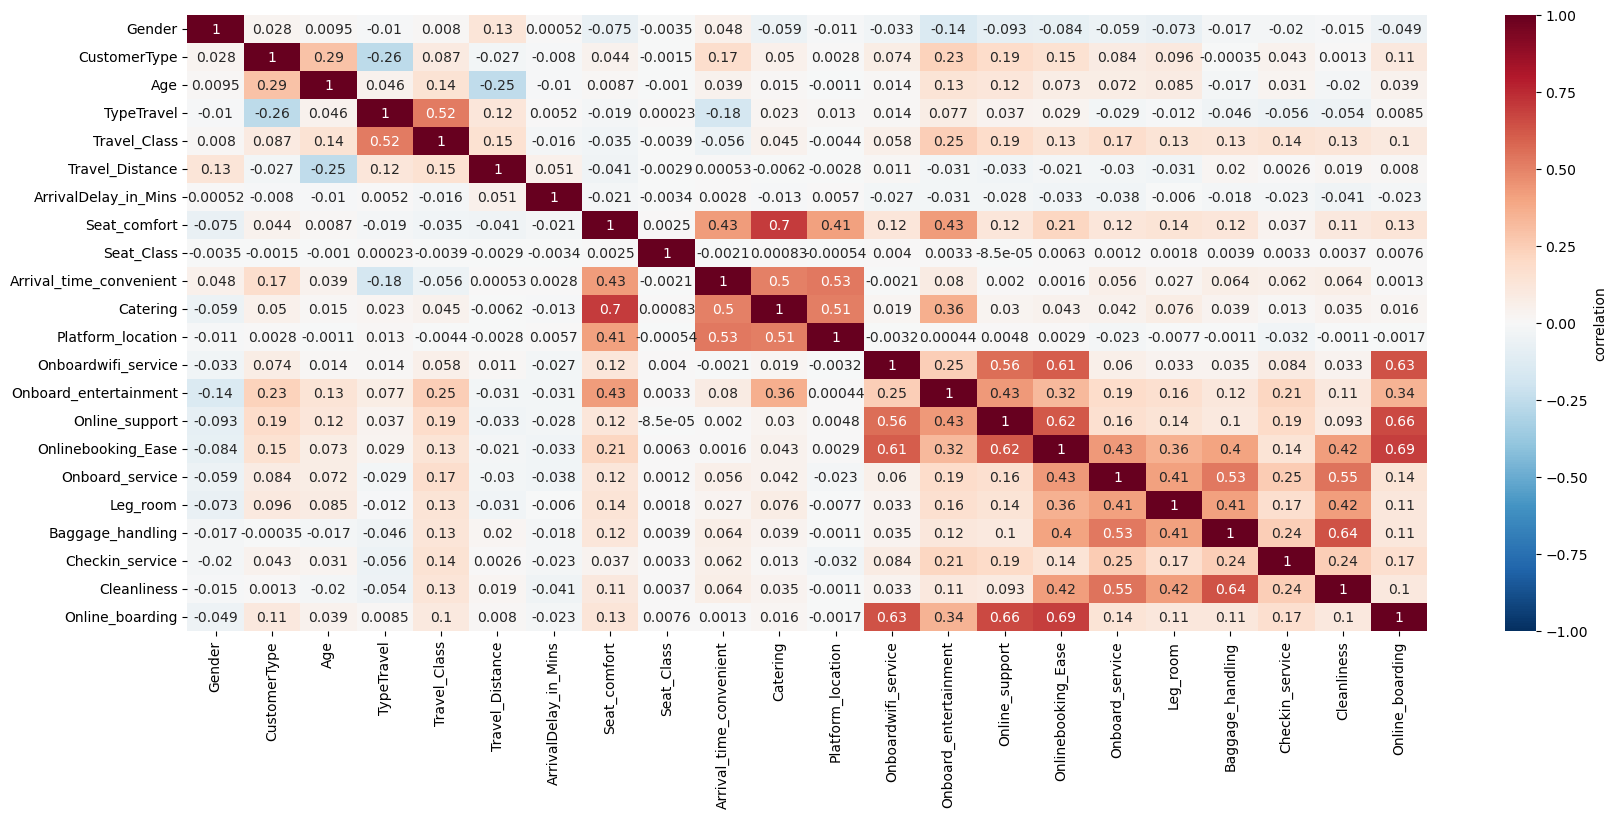

In [212]:
#Correlation for numerical_columns
df_corr = df.corr()

# Plot correlations as a heatmap

fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(df_corr, vmin=-1, vmax=1, cmap = 'RdBu_r', 
xticklabels=True, yticklabels=True, annot = True, cbar_kws={'label' : 'correlation'}, ax=ax)

In [214]:

X = df.loc[ind_train]
X_test = df.loc[ind_test]

In [215]:
y=y.astype('int')
print(X.shape, y.shape)
print(type(X),type(y))

(88639, 22) (88639, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [216]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset

# define the model
rand_forest_classifier_cv = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rand_forest_classifier_cv, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.952 (0.002)


In [217]:
rand_forest_classifier_cv.fit(X, y)

RandomForestClassifier()

In [218]:
X_test.shape

(35602, 22)

In [219]:
model = rand_forest_classifier_cv

In [220]:
sub = pd.DataFrame(X_test)

res = model.predict(X_test)

sub["Overall_Experience"] = res #res = model.predict(df_test)
sub_to_file = sub[["Overall_Experience"]]
sub_to_file.to_csv("rf_cl_cv_Day2_feature_eng.csv", index = True)
sub_to_file

,Overall_Experience
ID,
99900001,1
99900002,1
99900003,1
99900004,0
99900005,1
...,...
99935598,0
99935599,1
99935600,0
